Building a simple neural network to predict whether a house price will fall above or below the median. The data used can be downloaded here: https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view



In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
house_data = pd.read_csv("housepricedata.csv")
house_data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
# store house_data into an array
data = house_data.values
# split data into input features (X) and labels (Y)
X = data[:, :10] # get first 10 columns of dataframe
Y = data[:, -1]  # get last column of dataframe

# scale the data so that the input features have values b/w 0 and 1
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
# split training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=.3)
# split again into validation and test sets
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)
# output array shape in (rows, columns)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [ ]:
# define the model
model = Sequential()
# dense layer aka fully-connected layer
model.add(Dense(32, activation="relu", input_shape=(10, )))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

# train the model
history = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

In [ ]:
# returns loss and accuracy respectively
model.evaluate(X_test, Y_test)

219/219 [==============================] - 0s 122us/step


[0.24505609301127254, 0.9041095972061157]

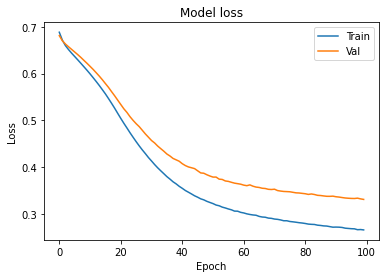

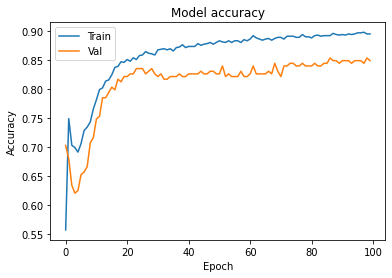

In [ ]:
# plot learning curves
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"])
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"])
plt.show()